In [1]:
import urllib.request
from bs4 import BeautifulSoup
import html2text


## Read in the html page of the Friends episode transcripts

In [2]:
filename = './season/0101.html'
f = open(filename, "r").read()
print(f)

<html>

<head>
<title>The One Where Monica Gets a New Roomate (The Pilot-The Uncut Version)</title>
</head>

<body bgcolor="white" text="black" link="green" vlink="black" alink="yellow">

<h1 align="center">The One Where Monica Gets a New Roommate (The Pilot-The Uncut Version)</h1>

<hr align="center">
<font size="3">

<p>Written by: Marta Kauffman &amp; David Crane</font><br>
Transcribed by: <a href="mailto:shadelet@easynet.co.uk">guineapig</a><br>
Additional transcribing by: <a href="mailto:Ericaasen1@aol.com">Eric Aasen</a><br>
(Note: The previously unseen parts of this episode are shown in <font color="#0000FF">blue</font><font
color="#000000"> text.)</font></p>

<hr>
<font size="3"><b>

<p align="left"></b>[Scene: Central Perk, Chandler, Joey, Phoebe, and Monica are there.]</font></p>

<p align="left"><font size="3"><b>Monica:</b> There's nothing to tell! He's just some guy
I work with!</font></p>

<p align="left"><font size="3"><b>Joey:</b> C'mon, you're going out with the guy! T

## Convert html into readable text using html2text

In [3]:
h = html2text.HTML2Text()
# Ignore converting links from HTML
h.ignore_links = True
print(h.handle(f))
first_episode = h.handle(f)

# The One Where Monica Gets a New Roommate (The Pilot-The Uncut Version)

* * *

Written by: Marta Kauffman & David Crane  
Transcribed by: guineapig  
Additional transcribing by: Eric Aasen  
(Note: The previously unseen parts of this episode are shown in blue text.)

* * *

**

** [Scene: Central Perk, Chandler, Joey, Phoebe, and Monica are there.]

**Monica:** There's nothing to tell! He's just some guy I work with!

**Joey:** C'mon, you're going out with the guy! There's gotta be something
wrong with him!

**Chandler:** All right Joey, be nice.  So does he have a hump? A hump and a
hairpiece?

**Phoebe:** Wait, does he eat chalk?

(They all stare, bemused.)

**Phoebe:** Just, 'cause, I don't want her to go through what I went through
with Carl- oh!

**Monica:** Okay, everybody relax. This is not even a date. It's just two
people going out to dinner and- not having sex.

**Chandler:** Sounds like a date to me.

[Time Lapse]

**Chandler:** Alright, so I'm back in high school, I'm sta

In [45]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

stopwords.add("Scene")

# Need to add stopwords for Frinds if I don't want to show their names
stop_friends = True

if stop_friends == True:
    stopwords.add("Monica")
    stopwords.add("Rachel")
    stopwords.add("Ross")
    stopwords.add("Phoebe")
    stopwords.add("Chandler")
    stopwords.add("Joey")
else:
    print('Firends listed')


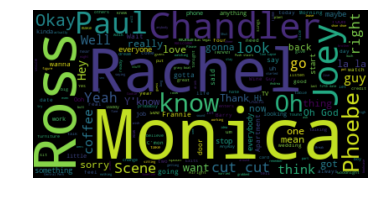

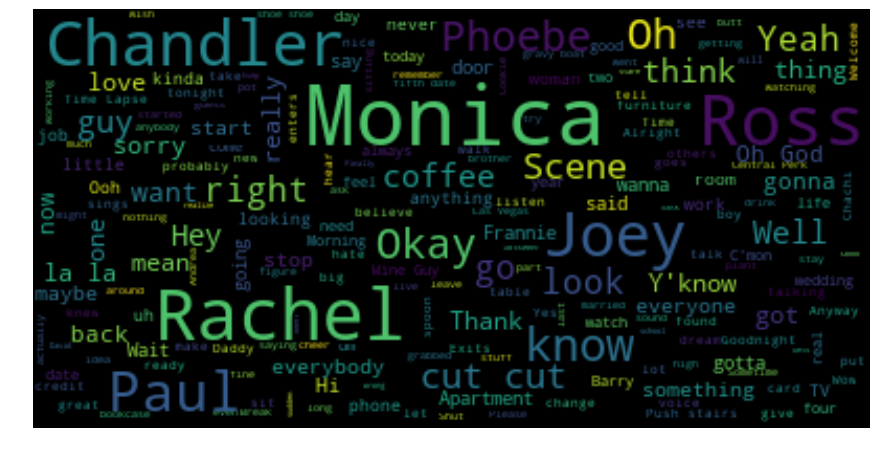

In [46]:
import os
from os import path


# Generate a word cloud image
wordcloud = WordCloud().generate(first_episode)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(first_episode)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

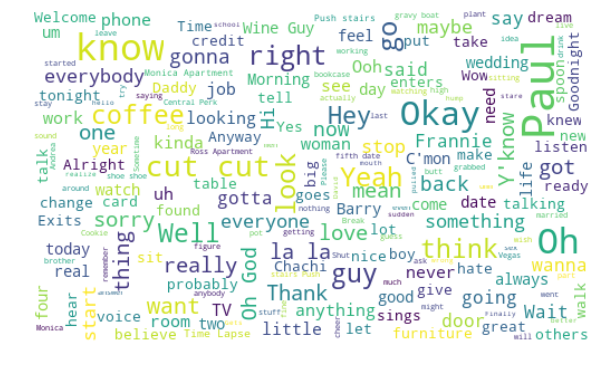

In [64]:
wordcloud = WordCloud(width=500, height=300, background_color='white', max_font_size=40, stopwords=stopwords).generate(first_episode)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()